In [22]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
dpc_weu_avg_df = pd.read_csv("dpc_weu_2021_2022_tour_3_division_1.csv")
dpc_weu_avg_df.head()

,Player,Position,Total Count,Wins,Losses,Winrate,As Radiant,As Dire,Kills,Deaths,...,Avg. KAL,GPM,XPM,Last Hits,Denies,LVL,HD,TD,HH,GS
0,Nisha,2,20,11,9,55.00%,10,10,9.30,2.80,...,7.07,651,759,405,10,26,39091,3843,323,25470
1,Puppey,5,20,11,9,55.00%,10,10,1.80,7.15,...,2.16,297,420,74,6,19,12655,582,4012,10392
2,Crystallis,1,20,11,9,55.00%,10,10,7.05,3.90,...,4.33,626,688,390,10,25,26695,9438,3,23111
3,Iceiceice,3,20,11,9,55.00%,10,10,5.25,5.70,...,2.98,501,631,280,11,23,18919,2946,2440,19175
4,Tobi,3,19,11,8,57.89%,5,14,3.53,3.89,...,4.54,444,545,233,22,22,22615,4561,910,16371


# Terms:

Dire / Radiant: the two sides of Dota2 teams. Dire, usually represented in color red, owns the top right half of the map, and radiant, usually represented in color blue, owns the bottom left half of the map. <br>

Position 1 - 5: 
<ol>
    <li> 1 = safe-lane carry (the carry player that plays the top lane of dire, or bottom lane of radiant. takes the most resources of the team and deals the most damage in most cases)</li>
    <li> 2 = mid-lane carry (the carry player that plays the midlane of both dire and radiant. takes about the same resources of position 1, but starts involving in teamfights earlier than position 1) </li>
    <li> 3 = off-lane carry (the carry player that plays the bottom lane of dire, or top lane of radiant. takes the least resources of carry positions, usually do stun, tank damage from opponent, and suppress opponent position 1 from farming (getting resources)) </li>
    <li> 4 = soft-support (supports position 3. takes a little resources occasionally. Do stun, teamfight initiation, lane helping etc) </li>
    <li> 5 = hard-support (supports position 1. some position 5 heroes can heal. takes the least resources in most cases) </li>
</ul>

GPM = Golds Per Minute <br>
XPM = Experience Per Minute <br>
Denies = Last hit on their own creeps <br>
HD = Hero Damage <br>
TD = Tower Damage <br>
HH = Hero Heal <br>
GS = Gold Sum <br>

# BASIC INFO

All data is gathered from https://www.datdota.com/. 

In [24]:
#basic info of the df
dpc_weu_avg_df.info

<bound method DataFrame.info of              Player  Position  Total Count  Wins  Losses Winrate  As Radiant  \
0             Nisha         2           20    11       9  55.00%          10   
1            Puppey         5           20    11       9  55.00%          10   
2        Crystallis         1           20    11       9  55.00%          10   
3         Iceiceice         3           20    11       9  55.00%          10   
4              Tobi         3           19    11       8  57.89%           5   
5          Kataomi`         4           19    11       8  57.89%           5   
6           Fishman         5           19    11       8  57.89%           5   
7              Pure         1           19    11       8  57.89%           5   
8      Stormstormer         2           19    11       8  57.89%           5   
9             MiCKe         2           18    13       5  72.22%          12   
10            Peksu         5           18     5      13  27.78%           7   
11      

In [25]:
#df description
dpc_weu_avg_df.describe()

,Position,Total Count,Wins,Losses,As Radiant,As Dire,Kills,Deaths,Assists,KDA,Avg. KAL,GPM,XPM,Last Hits,Denies,LVL,HD,TD,HH,GS
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,3.000000,16.279070,8.139535,8.139535,8.139535,8.139535,4.633023,5.175581,10.640000,4.215814,3.587907,447.976744,543.697674,205.441860,7.674419,20.348837,18739.348837,2521.604651,1554.465116,15305.232558
std,1.380131,4.404141,4.683209,3.700588,3.839527,3.522590,2.489144,2.028285,3.033828,2.368948,1.878037,141.643161,133.999029,121.215531,4.443941,2.975165,7279.332239,2787.615393,1658.417768,5188.512650
min,1.000000,2.000000,0.000000,2.000000,0.000000,1.000000,1.000000,2.410000,3.000000,0.460000,0.500000,249.000000,303.000000,32.000000,2.000000,14.000000,8582.000000,60.000000,0.000000,7586.000000
25%,2.000000,16.000000,5.000000,5.000000,5.000000,6.000000,2.245000,3.460000,8.890000,2.215000,2.045000,320.500000,428.000000,79.500000,4.500000,18.000000,12439.500000,608.500000,421.500000,10562.500000
50%,3.000000,18.000000,10.000000,8.000000,9.000000,7.000000,4.370000,4.890000,10.670000,3.850000,3.200000,447.000000,545.000000,222.000000,8.000000,21.000000,17625.000000,1364.000000,1167.000000,15133.000000
75%,4.000000,18.000000,11.000000,11.000000,11.000000,11.000000,6.790000,6.555000,13.190000,6.020000,4.800000,567.000000,673.000000,292.000000,10.000000,22.500000,24520.000000,3636.500000,1888.500000,19194.500000
max,5.000000,20.000000,13.000000,14.000000,13.000000,14.000000,9.580000,10.000000,16.160000,8.760000,7.360000,688.000000,759.000000,405.000000,22.000000,26.000000,39091.000000,13205.000000,7691.000000,25576.000000


In [26]:
#check null values
dpc_weu_avg_df.isna().sum()

Player         0
Position       0
Total Count    0
Wins           0
Losses         0
Winrate        0
As Radiant     0
As Dire        0
Kills          0
Deaths         0
Assists        0
KDA            0
Avg. KAL       0
GPM            0
XPM            0
Last Hits      0
Denies         0
LVL            0
HD             0
TD             0
HH             0
GS             0
dtype: int64

In [27]:
#HD, TD, HH, AND GS are vague abbreviations. Changing names of certain columns
dpc_weu_avg_df.rename(columns = {'HD': 'Hero Damage',
                 'TD': 'Tower Damage',
                 'HH': 'Hero Heal',
                 'GS': 'Gold Sum'}, inplace = True)
print(dpc_weu_avg_df.columns)

Index(['Player', 'Position', 'Total Count', 'Wins', 'Losses', 'Winrate',
       'As Radiant', 'As Dire', 'Kills', 'Deaths', 'Assists', 'KDA',
       'Avg. KAL', 'GPM', 'XPM', 'Last Hits', 'Denies', 'LVL', 'Hero Damage',
       'Tower Damage', 'Hero Heal', 'Gold Sum'],
      dtype='object')


In [28]:
#Unique Positions
dpc_weu_avg_df['Position'].unique()

array([2, 5, 1, 3, 4], dtype=int64)

In [30]:
#position 1 to 5 may be vague and unclear to non-dota players. Here I renamed each rows:
#position 1: safelane carry; position 2: midlane carry; position 3: offlane carry; position 4: soft-support(offlane-support); position 5: hard-support(safelane_support)
dpc_weu_avg_df['Position'].replace({5: 'hard-support(safelane_support)', 4: 'soft-support(offlane-support)', 3: 'offlane carry', 2: 'midlane carry', 1: 'safelane carry'}, inplace = True)
dpc_weu_avg_df.head()

,Player,Position,Total Count,Wins,Losses,Winrate,As Radiant,As Dire,Kills,Deaths,...,Avg. KAL,GPM,XPM,Last Hits,Denies,LVL,Hero Damage,Tower Damage,Hero Heal,Gold Sum
0,Nisha,midlane carry,20,11,9,55.00%,10,10,9.30,2.80,...,7.07,651,759,405,10,26,39091,3843,323,25470
1,Puppey,hard-support(safelane_support),20,11,9,55.00%,10,10,1.80,7.15,...,2.16,297,420,74,6,19,12655,582,4012,10392
2,Crystallis,safelane carry,20,11,9,55.00%,10,10,7.05,3.90,...,4.33,626,688,390,10,25,26695,9438,3,23111
3,Iceiceice,offlane carry,20,11,9,55.00%,10,10,5.25,5.70,...,2.98,501,631,280,11,23,18919,2946,2440,19175
4,Tobi,offlane carry,19,11,8,57.89%,5,14,3.53,3.89,...,4.54,444,545,233,22,22,22615,4561,910,16371


In [31]:
#players count in each position
count_df = dpc_weu_avg_df.groupby(by = 'Position').count()
count_df.drop(count_df.columns[1:], axis = 1, inplace = True)
count_df

,Player
Position,
hard-support(safelane_support),8
midlane carry,8
offlane carry,11
safelane carry,8
soft-support(offlane-support),8


# General Analysis of All DPC(WEU) Players in the 2021/2022 Tour 3 Division I

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'hard-support(safelane_support)'),
  Text(1, 0, 'soft-support(offlane-support)'),
  Text(2, 0, 'offlane carry'),
  Text(3, 0, 'midlane carry'),
  Text(4, 0, 'safelane carry')])

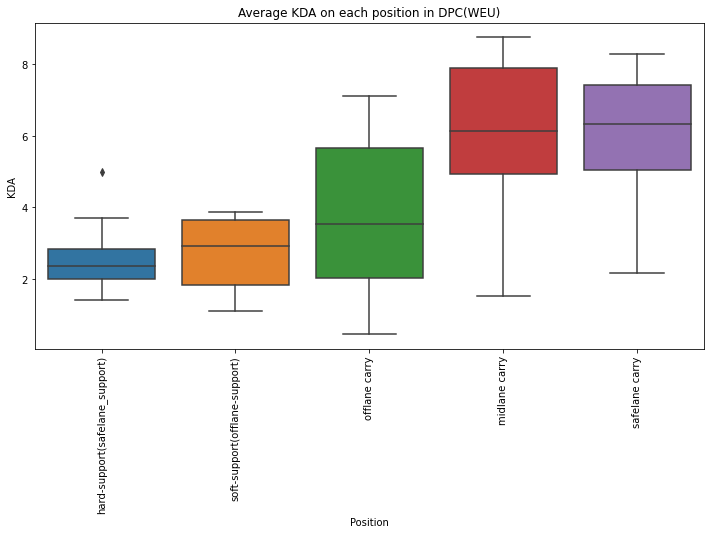

In [33]:
#average KDA(kill/death/assist) index of players in each position
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Position', y = 'KDA', data = dpc_weu_avg_df, order = ['hard-support(safelane_support)', 
                                                                       'soft-support(offlane-support)',
                                                                      'offlane carry',
                                                                      'midlane carry',
                                                                      'safelane carry']).set(title = 'Average KDA on each position in DPC(WEU)')
plt.xticks(rotation = 90)

In DPC West Europe2021/2022 Tour 3 Division I, midlane carry players (position 2) have the highest KDA (Kill/Death/Assist) ratio. The KDA ranges the most in offlane carry players, ranging from <2 to >8. 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'hard-support(safelane_support)'),
  Text(1, 0, 'soft-support(offlane-support)'),
  Text(2, 0, 'offlane carry'),
  Text(3, 0, 'midlane carry'),
  Text(4, 0, 'safelane carry')])

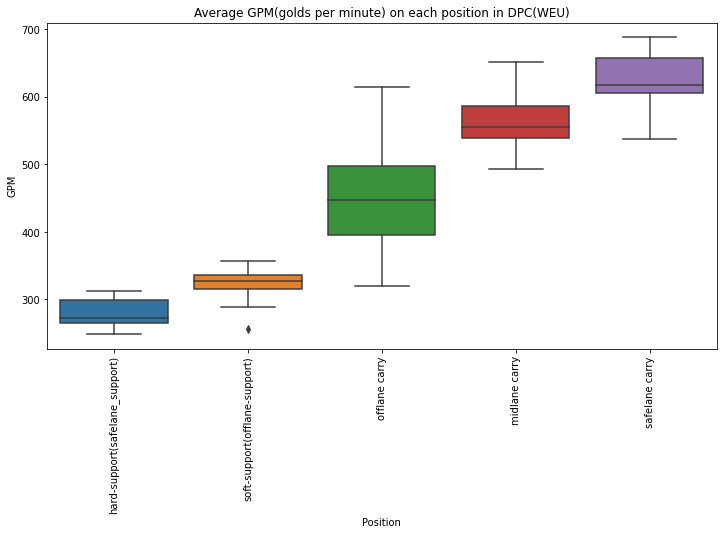

In [38]:
#average GPM index of players in each position
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Position', y = 'GPM', data = dpc_weu_avg_df, order = ['hard-support(safelane_support)', 
                                                                       'soft-support(offlane-support)',
                                                                      'offlane carry',
                                                                      'midlane carry',
                                                                      'safelane carry']).set(title = 'Average GPM(golds per minute) on each position in DPC(WEU)')
plt.xticks(rotation = 90)

As for GPM (gold per minute, the index that reflects the how much resources on the map a player takes), safelane carry players take the most resources, and offlane carry players take the least among the carry positions. Position 4 and position 5 (supports) take resources much less, with a highest average GPM player at about 360 and 310. 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'hard-support(safelane_support)'),
  Text(1, 0, 'soft-support(offlane-support)'),
  Text(2, 0, 'offlane carry'),
  Text(3, 0, 'midlane carry'),
  Text(4, 0, 'safelane carry')])

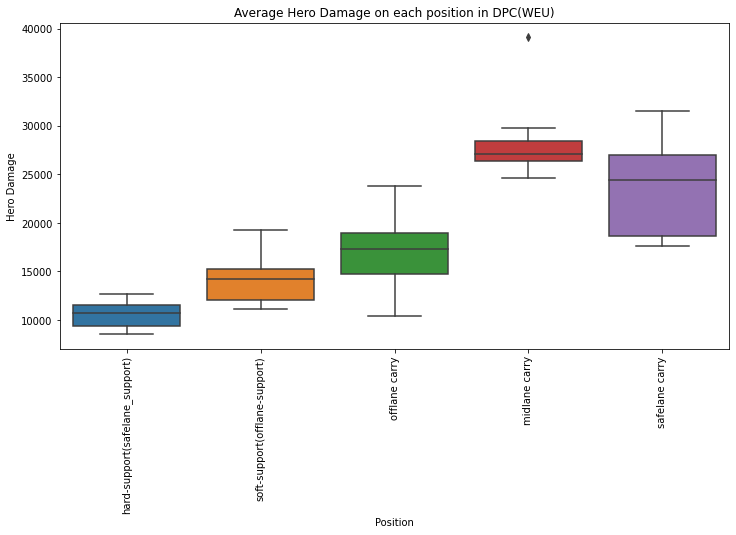

In [89]:
#average Hero Damage index of players in each position
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Position', y = 'Hero Damage', data = dpc_weu_avg_df, order = ['hard-support(safelane_support)', 
                                                                       'soft-support(offlane-support)',
                                                                      'offlane carry',
                                                                      'midlane carry',
                                                                      'safelane carry']).set(title = 'Average Hero Damage on each position in DPC(WEU)')
plt.xticks(rotation = 90)

In DPC(WEU) 2021/2022 Tour 3 Division I, midlane carry players generally deal the most damage. The highest average damage is done by a nisha, a mid-lane carry player, who has an extreme value of almost 40k. Safelane carry players' damage vary hugely ranging from 18k to almost 33k. As for offlane carry players, much less damge is done. 
This can be possibly be explained with the hero picks in west EU teams. Compared to previously analyzed DPC(CN) tour, west European teams tend to pick mid and safe-lane players with high damage heroes, instead of those heroes with more heavy focus on teamfight tactics and pushing abilities in China.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'hard-support(safelane_support)'),
  Text(1, 0, 'soft-support(offlane-support)'),
  Text(2, 0, 'offlane carry'),
  Text(3, 0, 'midlane carry'),
  Text(4, 0, 'safelane carry')])

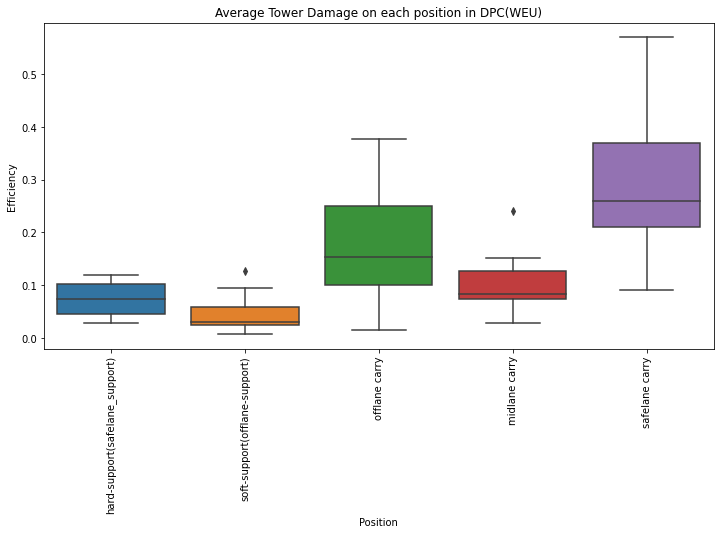

In [90]:
#average player efficiency index of players in each position
#Dota2 wins by taking down towers of the opponent team. 
#Here, the tower damage index would be calculated by dividing the average gold sum to the tower damage, which states how much gold it takes for a player to deal the most damage to the tower,
dpc_weu_avg_df['Efficiency'] = (dpc_weu_avg_df['Tower Damage']/ dpc_weu_avg_df['Gold Sum']).astype(float)
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Position', y = 'Efficiency', data = dpc_weu_avg_df, order = ['hard-support(safelane_support)', 
                                                                       'soft-support(offlane-support)',
                                                                      'offlane carry',
                                                                      'midlane carry',
                                                                      'safelane carry']).set(title = 'Average Tower Damage on each position in DPC(WEU)')
plt.xticks(rotation = 90)

It can be seen from this chart that most tower damage and pushing is done by position 1, instead of both position 1 and 3 in Chinese teams. It appears that in west European teams, offlane carry players are more dedicated in teamfight, and safelane carry players have hero picks that are both strong in teamfights and pushing. As compared to Chinese region, where pushing ability is done by both offlane and safelane carries, WEU tend to rely mostly on safelane carries. Both region have low midlane carry tower damage efficiency. 

In [40]:
#Average minutes per game of each player (by dividing GPM from gold sum). 
#This would reflect the efficiency of each player and the optimum length of game for them to perform the best.

dpc_weu_avg_df['Average Game Length (min)'] = dpc_weu_avg_df['Gold Sum'] / dpc_weu_avg_df['GPM']

In [41]:
#Players that requires the largest game length:

max_len = dpc_weu_avg_df[['Player', 'Average Game Length (min)', 'Position', 'KDA']].nlargest(n = 5, columns = 'Average Game Length (min)')
print(max_len)

       Player  Average Game Length (min)                       Position   KDA
0       Nisha                  39.124424                  midlane carry  8.76
3   Iceiceice                  38.273453                  offlane carry  3.54
21       Boxi                  37.628125                  offlane carry  4.05
16      Zayac                  37.176471  soft-support(offlane-support)  2.95
7        Pure                  37.174419                 safelane carry  8.29


In [42]:
#Players that requires the least game length:

min_len = dpc_weu_avg_df[['Player', 'Average Game Length (min)', 'Position', 'KDA']].nsmallest(n = 5, columns = 'Average Game Length (min)')
print(min_len)

    Player  Average Game Length (min)                       Position   KDA
37  Aramis                  29.632812  soft-support(offlane-support)  1.11
29   Saksa                  29.906061  soft-support(offlane-support)  2.90
30   Taiga                  30.101852  soft-support(offlane-support)  3.57
32     ATF                  30.695740                  offlane carry  4.91
31  Yuragi                  30.700658                 safelane carry  7.06


Player **Nisha**, **Zayac**, and **Iceiceice**, all from Team Secret, have the longest average game length, as well as **Boxi** from Team Liquid and **Pure** from Entity. This not only reflects the fact that these three teams plays a longer game than other teams, but also indicates that these players require longer game length and more farming time than others. <br>
On the other hand, **Taiga**, **ATF**, and **Yuragi** from OG all have the least game length on average. It partially reflects that PSG.LGD plays a faster pace game than other teams. 

# Best Players / Stand-out Players

In [91]:
#the mean of all average kills of players in Dota Pro Circuit West Europe 2021-2022 Summer Division 1 is 4.333902, with a standard diviation of 2.088248	
mean_kill = 4.333902
std_kill = 2.088248
distinct_kill = mean_kill + std_kill

#after defining the distinct value for selecting distinct players, we list the relative important data of these players
mask = dpc_weu_avg_df['Kills'].values >= distinct_kill
distinct_players = dpc_weu_avg_df.loc[mask]
distinct_players.drop(distinct_players.columns[2:5], axis = 1, inplace = True)
print(distinct_players)

          Player        Position Winrate  As Radiant  As Dire  Kills  Deaths  \
0          Nisha   midlane carry  55.00%          10       10   9.30    2.80   
2     Crystallis  safelane carry  55.00%          10       10   7.05    3.90   
7           Pure  safelane carry  57.89%           5       14   9.58    3.42   
8   Stormstormer   midlane carry  57.89%           5       14   8.37    3.00   
9          MiCKe   midlane carry  72.22%          12        6   7.33    3.17   
15      DyrachYO  safelane carry  38.89%          11        7   6.56    4.89   
19    MATUMBAMAN  safelane carry  72.22%          12        6   9.06    2.50   
20           Zai   offlane carry  72.22%          12        6   6.83    3.28   
22         Limmp   midlane carry  27.78%           7       11   6.44    3.56   
23          BOOM   midlane carry  38.89%          11        7   7.28    3.56   
27          Nine   midlane carry  76.47%          13        4   6.76    3.00   
28        skiter  safelane carry  76.47%

C:\Users\Dominic\AppData\Local\Temp\ipykernel_27988\4205091641.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distinct_players.drop(distinct_players.columns[2:5], axis = 1, inplace = True)


In [51]:
#top 10 players with respect to KDA index:

top_5_kda = dpc_weu_avg_df[['Player', 'Position', 'KDA', 'Winrate']].nlargest(n = 5, columns = 'KDA')
top_5_kda

,Player,Position,KDA,Winrate
0,Nisha,midlane carry,8.76,55.00%
8,Stormstormer,midlane carry,8.55,57.89%
7,Pure,safelane carry,8.29,57.89%
19,MATUMBAMAN,safelane carry,8.06,72.22%
27,Nine,midlane carry,7.70,76.47%


The player that performs the best (based on KDA data) is **Nisha** , midlane carry player from Team Secret, with a winrate of 55.00%. The second best midlane carry player in DPC West EU is **Stormstormer** , from Entity, with a winrate of 57.89. <br>
As for safelane carry players, **Pure** from Entity and **MATUMBAMAN** from Team Liquid stands out from all players with KDA of 8.29 and 8.06. 
Compared to DPC in China, WEU players with the best performances are mostly midlane or safelane carries. It can be reflected that position 3 (offlane carries) are less focused and are less performing well among all players compared to DPC China, where multiple position 3 players have a high KDA. 

In [53]:
top_5_kda['Winrate'] = top_5_kda['Winrate'].str.rstrip('%').astype('float') / 100.0

In [54]:
#top 10 players' winrate:
top_5_kda_wr = top_5_kda[['Player', 'Position', 'KDA', 'Winrate']].nlargest(n = 5, columns = 'Winrate')
top_5_kda_wr

,Player,Position,KDA,Winrate
27,Nine,midlane carry,7.70,0.7647
19,MATUMBAMAN,safelane carry,8.06,0.7222
8,Stormstormer,midlane carry,8.55,0.5789
7,Pure,safelane carry,8.29,0.5789
0,Nisha,midlane carry,8.76,0.5500


This part is only sorting top 5 KDA players with their winrate. We can see that even though Nisha has such a extraordinary performance with an extreme value of average damage and highest KDA of 8.76, his team's winrate is only 0.55. It can draw two possible conclusions, without further data: either Nisha is not a great team player that his performance does not contribute to the winning of the team, or his teammate are not performing good enough to match his extraordinary performance in mid-lane. 

In [92]:
top_5_rd = dpc_weu_avg_df.nlargest(n = 5, columns = 'KDA')
top_5_rd.drop(['Player', 'Position', 'Total Count', 'Wins', 'Losses', 'Winrate', 'As Radiant', 'As Dire', 'Kills', 'Deaths', 'Assists', 'Avg. KAL', 'LVL', 'Hero Heal', 'Last Hits', 'Denies'], axis = 1)
top_5_rd.reset_index()
top_5_rd

,Player,Position,Total Count,Wins,Losses,Winrate,As Radiant,As Dire,Kills,Deaths,...,XPM,Last Hits,Denies,LVL,Hero Damage,Tower Damage,Hero Heal,Gold Sum,Efficiency,Average Game Length (min)
0,Nisha,midlane carry,20,11,9,55.00%,10,10,9.30,2.80,...,759,405,10,26,39091,3843,323,25470,0.150883,39.124424
8,Stormstormer,midlane carry,19,11,8,57.89%,5,14,8.37,3.00,...,736,373,10,25,28023,5254,27,21787,0.241153,35.541599
7,Pure,safelane carry,19,11,8,57.89%,5,14,9.58,3.42,...,696,396,9,25,31480,3356,447,25576,0.131217,37.174419
19,MATUMBAMAN,safelane carry,18,13,5,72.22%,12,6,9.06,2.50,...,717,362,12,24,27982,13205,181,23176,0.569770,35.655385
27,Nine,midlane carry,17,13,4,76.47%,13,4,6.76,3.00,...,681,271,8,22,27013,1404,1196,17353,0.080908,31.323105


In [93]:
top_5_rd['Laning Ability'] = (top_5_rd['Last Hits'] / top_5_rd['Denies']).astype(float)
top_5_rd_data = top_5_rd.drop(['Player', 'Position', 'Total Count', 'Wins', 'Losses', 'Winrate', 'As Radiant', 'As Dire', 'Kills', 'Deaths', 'Assists', 'Avg. KAL', 'LVL', 'Hero Heal', 'Last Hits', 'Denies'], axis = 1)
top_5_rd_data

,KDA,GPM,XPM,Hero Damage,Tower Damage,Gold Sum,Efficiency,Average Game Length (min),Laning Ability
0,8.76,651,759,39091,3843,25470,0.150883,39.124424,40.500000
8,8.55,613,736,28023,5254,21787,0.241153,35.541599,37.300000
7,8.29,688,696,31480,3356,25576,0.131217,37.174419,44.000000
19,8.06,650,717,27982,13205,23176,0.569770,35.655385,30.166667
27,7.70,554,681,27013,1404,17353,0.080908,31.323105,33.875000


In [94]:
top_5_rd_name = top_5_rd.iloc[:, [0]].copy()
top_5_rd_name

,Player
0,Nisha
8,Stormstormer
7,Pure
19,MATUMBAMAN
27,Nine


In [95]:
#Normalilzing data

top_5_rd_data_max_scaled = top_5_rd_data.copy()

for columns in top_5_rd_data_max_scaled.columns:
    top_5_rd_data_max_scaled[columns] = top_5_rd_data_max_scaled[columns]  / top_5_rd_data_max_scaled[columns].abs().max()
    
top_5_rd_data_max_scaled = top_5_rd_data_max_scaled.multiply(10)
top_5_rd_data_max_scaled.iloc[0]

KDA                          10.000000
GPM                           9.462209
XPM                          10.000000
Hero Damage                  10.000000
Tower Damage                  2.910261
Gold Sum                      9.958555
Efficiency                    2.648144
Average Game Length (min)    10.000000
Laning Ability                9.204545
Name: 0, dtype: float64

In [96]:
nisha = top_5_rd_data_max_scaled.iloc[0].tolist()
nisha = np.concatenate((nisha, [nisha[0]]))

stormstormer = top_5_rd_data_max_scaled.iloc[1].tolist()
stormstormer = np.concatenate((stormstormer, [stormstormer[0]]))

pure = top_5_rd_data_max_scaled.iloc[2].tolist()
pure = np.concatenate((pure, [pure[0]]))

matumbaman = top_5_rd_data_max_scaled.iloc[3].tolist()
matumbaman = np.concatenate((matumbaman, [matumbaman[0]]))

nine = top_5_rd_data_max_scaled.iloc[4].tolist()
nine = np.concatenate((nine, [nine[0]]))

nisha

array([10.        ,  9.4622093 , 10.        , 10.        ,  2.91026126,
        9.9585549 ,  2.6481435 , 10.        ,  9.20454545, 10.        ])

In [97]:
categories = top_5_rd_data_max_scaled.columns.tolist()
categories = np.concatenate((categories, [categories[0]]))
len(categories)

10

In [98]:
label_placement = np.linspace(start = 0, stop = 2*np.pi, num = len(nisha))

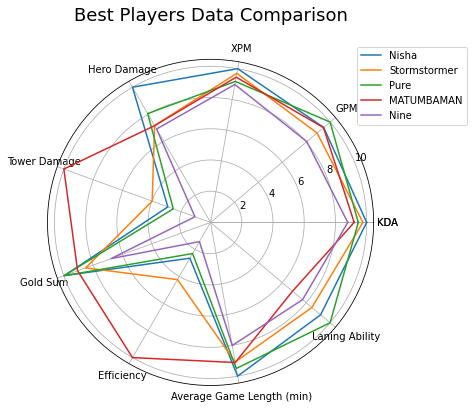

In [99]:
plt.figure(figsize = (6, 6))
plt.subplot(polar = True)
plt.plot(label_placement, nisha)
plt.plot(label_placement, stormstormer)
plt.plot(label_placement, pure)
plt.plot(label_placement, matumbaman)
plt.plot(label_placement, nine)
lines, labels = plt.thetagrids(np.degrees(label_placement), labels = categories)
plt.title('Best Players Data Comparison', y = 1.1, fontdict = {'fontsize': 18})
plt.legend(labels = top_5_rd_name['Player'].tolist(), loc = (0.95, 0.8))

In [100]:
#isolate 2 best midlane player comparison in the top 5 KDA chart


best_mid = dpc_weu_avg_df[(dpc_cn_avg_df['Player'] == 'Nisha') | (dpc_weu_avg_df['Player'] == 'Nine')].reset_index()
best_mid

,index,Player,Position,Total Count,Wins,Losses,Winrate,As Radiant,As Dire,Kills,...,XPM,Last Hits,Denies,LVL,Hero Damage,Tower Damage,Hero Heal,Gold Sum,Efficiency,Average Game Length (min)
0,0,Nisha,midlane carry,20,11,9,55.00%,10,10,9.30,...,759,405,10,26,39091,3843,323,25470,0.150883,39.124424
1,27,Nine,midlane carry,17,13,4,76.47%,13,4,6.76,...,681,271,8,22,27013,1404,1196,17353,0.080908,31.323105


In [101]:
best_mid['Laning Ability'] = (best_mid['Last Hits'] / best_mid['Denies']).astype(float)
best_mid_data = best_mid.drop(['index', 'Player', 'Position', 'Total Count', 'Wins', 'Losses', 'Winrate', 'As Radiant', 'As Dire', 'Kills', 'Deaths', 'Assists', 'Avg. KAL', 'LVL', 'Hero Heal', 'Last Hits', 'Denies'], axis = 1)
best_mid_data

,KDA,GPM,XPM,Hero Damage,Tower Damage,Gold Sum,Efficiency,Average Game Length (min),Laning Ability
0,8.76,651,759,39091,3843,25470,0.150883,39.124424,40.500
1,7.70,554,681,27013,1404,17353,0.080908,31.323105,33.875


In [102]:
best_mid_name = best_mid.iloc[:, [1]].copy()
best_mid_name

,Player
0,Nisha
1,Nine


In [103]:
best_mid_data

,KDA,GPM,XPM,Hero Damage,Tower Damage,Gold Sum,Efficiency,Average Game Length (min),Laning Ability
0,8.76,651,759,39091,3843,25470,0.150883,39.124424,40.500
1,7.70,554,681,27013,1404,17353,0.080908,31.323105,33.875


In [104]:
from sklearn.preprocessing import MinMaxScaler

In [105]:
test = best_mid_data.copy().astype(float)
test

,KDA,GPM,XPM,Hero Damage,Tower Damage,Gold Sum,Efficiency,Average Game Length (min),Laning Ability
0,8.76,651.0,759.0,39091.0,3843.0,25470.0,0.150883,39.124424,40.500
1,7.70,554.0,681.0,27013.0,1404.0,17353.0,0.080908,31.323105,33.875


In [106]:
#Normalilzing data

best_mid_data_max_scaled = best_mid_data.copy()

for columns in best_mid_data_max_scaled.columns:
    best_mid_data_max_scaled[columns] = best_mid_data_max_scaled[columns]  / best_mid_data_max_scaled[columns].abs().max()
    
best_mid_data_max_scaled = best_mid_data_max_scaled.multiply(10)
best_mid_data_max_scaled

,KDA,GPM,XPM,Hero Damage,Tower Damage,Gold Sum,Efficiency,Average Game Length (min),Laning Ability
0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000,10.000000,10.000000
1,8.789954,8.509985,8.972332,6.910286,3.653396,6.813113,5.3623,8.006023,8.364198


In [107]:
nisha2 = best_mid_data_max_scaled.loc[0].tolist()
nisha2 = np.concatenate((nisha2, [nisha2[0]]))

nine2 = best_mid_data_max_scaled.loc[1].tolist()
nine2 = np.concatenate((nine2, [nine2[0]]))

nisha2

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

In [108]:
categories = best_mid_data_max_scaled.columns.tolist()
categories = np.concatenate((categories, [categories[0]]))
len(categories)

10

In [109]:
label_placement = np.linspace(start = 0, stop = 2*np.pi, num = len(nts))

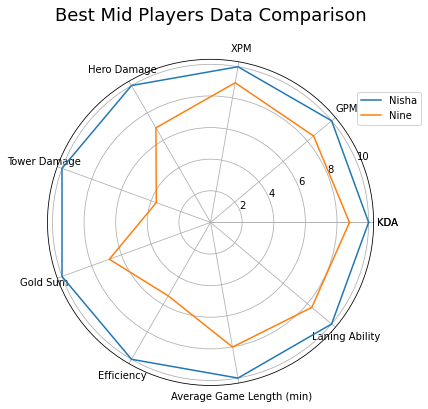

In [110]:
plt.figure(figsize = (6, 6))
plt.subplot(polar = True)
plt.plot(label_placement, nisha2)
plt.plot(label_placement, nine2)
lines, labels = plt.thetagrids(np.degrees(label_placement), labels = categories)
plt.title('Best Mid Players Data Comparison', y = 1.1, fontdict = {'fontsize': 18})
plt.legend(labels = best_mid_name['Player'].tolist(), loc = (0.95, 0.8))

0 Nisha 651 8.76 Nisha
1 Puppey 297 2.27 Puppey
2 Crystallis 626 5.45 Crystallis
3 Iceiceice 501 3.54 Iceiceice
4 Tobi 444 6.92 Tobi
5 Kataomi` 354 3.87 Kataomi`
6 Fishman 269 2.53 Fishman
7 Pure 688 8.29 Pure
8 Stormstormer 613 8.55 Stormstormer
9 MiCKe 556 6.75 MiCKe
10 Peksu 270 1.86 Peksu
11 tOfu 327 3.85 tOfu
12 Ace 489 3.42 Ace
13 Handsken 289 2.0 Handsken
14 S4 421 2.28 S4
15 DyrachYO 679 5.62 DyrachYO
16 Zayac 357 2.95 Zayac
17 aQua 602 3.89 aQua
18 INSaNiA 312 4.98 INSaNiA
19 MATUMBAMAN 650 8.06 MATUMBAMAN
20 Zai 543 6.42 Zai
21 Boxi 320 4.05 Boxi
22 Limmp 515 4.94 Limmp
23 BOOM 547 5.54 BOOM
24 Seleri 276 2.43 Seleri
25 33 614 7.12 33
26 Sneyking 306 3.71 Sneyking
27 Nine 554 7.7 Nine
28 skiter 606 7.23 skiter
29 Saksa 330 2.9 Saksa
30 Taiga 324 3.57 Taiga
31 Yuragi 608 7.06 Yuragi
32 ATF 493 4.91 ATF
33 Misha 249 2.04 Misha
34 bzm 578 4.93 bzm
35 CTOMAHEH1 253 1.41 CTOMAHEH1
36 Nikobaby 537 2.16 Nikobaby
37 Aramis 256 1.11 Aramis
38 W33 493 1.52 W33
39 symetricaL 370 1.18 sy

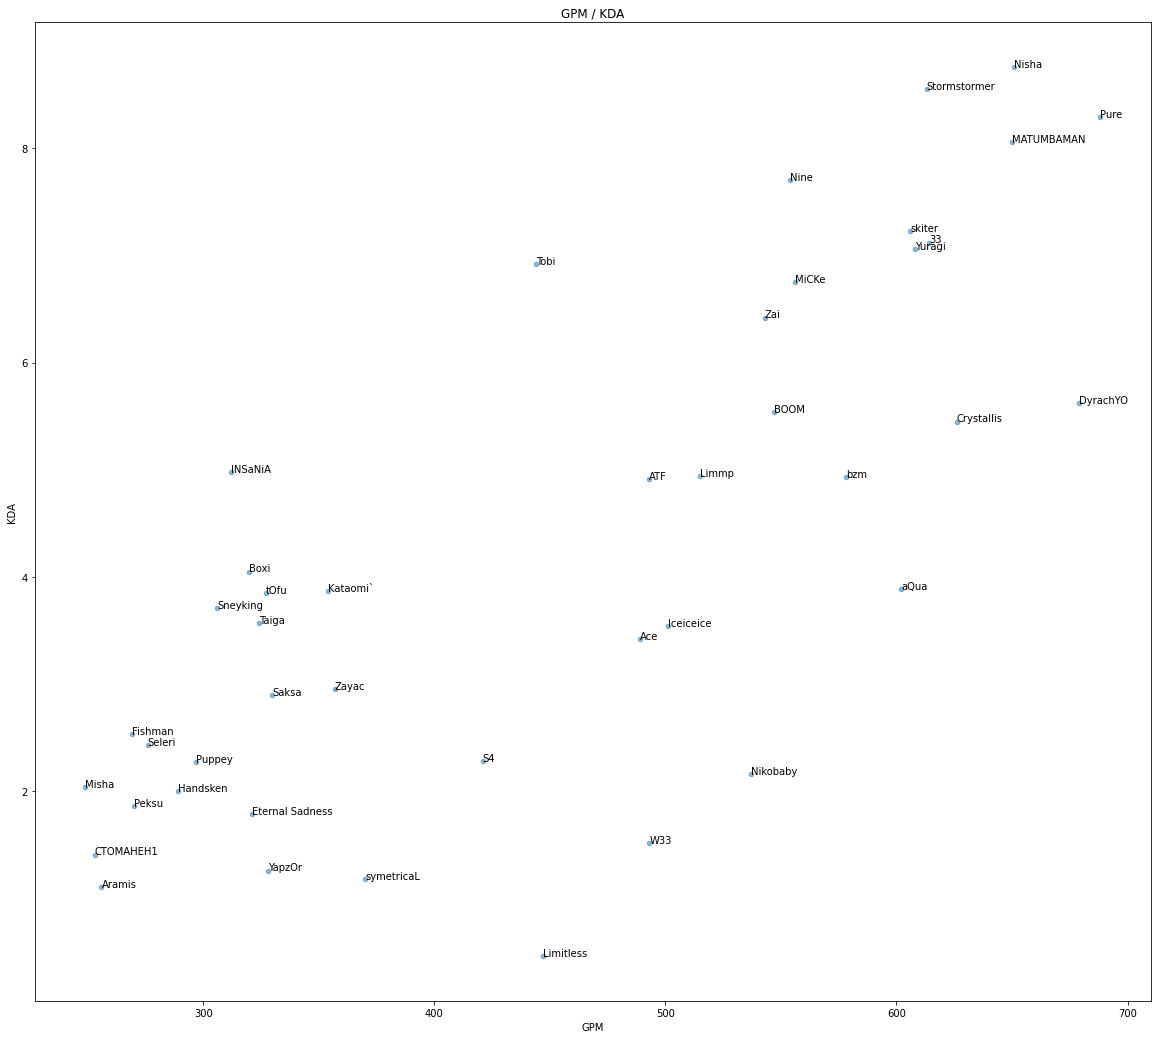

In [111]:
#Player efficiency based on GPM with KDA

a = plt.figure()
a.set_figwidth(20)
a.set_figheight(18)

plt.scatter(x = dpc_cn_avg_df['GPM'],
      y = dpc_cn_avg_df['KDA'],
      s = 20,
      alpha = 0.5)

plt.title('GPM / KDA')
plt.xlabel('GPM')
plt.ylabel('KDA')

x, y = dpc_weu_avg_df['GPM'], dpc_weu_avg_df['KDA']
for i, txt in enumerate(dpc_weu_avg_df['Player']):
  plt.annotate(txt, (x[i], y[i]))
  print(i, txt, x[i], y[i], dpc_weu_avg_df['Player'][i])

This chart shows the amount of resource a player takes and the amount of impact (here, only indicated through KDA) they created in the game.<br>
It can be seen that **Nisha** from Team Secret takes about 640 GPM and has the highest KDA of all players. As for the player that has both a high GPM and a high KDA, **Pure** from Entity, **MATUMBAMAN** from Team Liquid, and **Stormstormer** from Entity all stand on the top left corner. <br>
Players that has a high GPM but is only medicre in KDA includes **DyrachYO** from Gaimin Gladiator, **Crystallis** from Team Secret, **aQua** from goonsquad, **bzm** from OG, and **Nikobaby** from Alliance.

<AxesSubplot:title={'center':'Top 10 Player GPM'}, xlabel='Player', ylabel='Player GPM'>

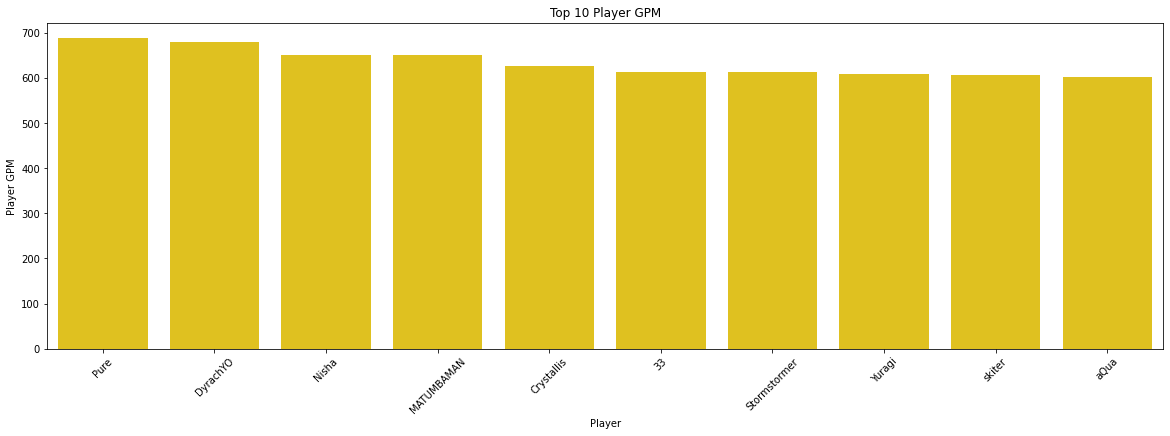

In [112]:
# top 10 Players with the highest GPM

dpc_weu_gpm = dpc_weu_avg_df.sort_values(by = 'GPM', ascending = False)[:10]
plt.figure(figsize = (20, 6))
plt.title("Top 10 Player GPM")
gpm_chart = sns.barplot(x = dpc_weu_gpm['Player'], y = dpc_weu_gpm['GPM'], label = 'Players', color = 'gold')
plt.ylabel('Player GPM')
gpm_chart.set_xticklabels(gpm_chart.get_xticklabels(), rotation = 45)
gpm_chart

From the chart, most position 1 players have the highest GPM. **Pure** from Entity has the highest average gpm of all West EU DPC players. **Nisha** from Team Secret has the highest GPM of all position 2 players.

# Position Analysis - Position 5 (Hard Support)

In [113]:
#Best Player at each position:

#isolating position 5 (hard support) players
mask_5 = dpc_weu_avg_df['Position'].values == 'hard-support(safelane_support)'
pos_5_players = dpc_weu_avg_df.loc[mask_5]
print(pos_5_players)

       Player                        Position  Total Count  Wins  Losses  \
1      Puppey  hard-support(safelane_support)           20    11       9   
6     Fishman  hard-support(safelane_support)           19    11       8   
10      Peksu  hard-support(safelane_support)           18     5      13   
18    INSaNiA  hard-support(safelane_support)           18    13       5   
24     Seleri  hard-support(safelane_support)           18     7      11   
26   Sneyking  hard-support(safelane_support)           17    13       4   
33      Misha  hard-support(safelane_support)           16    10       6   
35  CTOMAHEH1  hard-support(safelane_support)           14     0      14   

   Winrate  As Radiant  As Dire  Kills  Deaths  ...  XPM  Last Hits  Denies  \
1   55.00%          10       10   1.80    7.15  ...  420         74       6   
6   57.89%           5       14   2.37    9.21  ...  379         36       8   
10  27.78%           7       11   1.89    7.94  ...  346         55       3   

In [114]:
#For position 5, the best players should be analyzed based on their general impact. 
#By dividing gold sum from hero damage, we can see the ratio of gold they consumes (resources of a team) to the actual damage (impact on the opponent team) they create. 
#I will call this index 'resource/impact ratio'
pos_5_players['resource/impact ratio'] = ((pos_5_players['Hero Damage'] + pos_5_players['Hero Heal']) / pos_5_players['Gold Sum']).astype(float)
top_pos_5_players = pos_5_players[['Player', 'KDA', 'Winrate', 'GPM', 'XPM', 'Hero Damage', 'Hero Heal', 'resource/impact ratio']].nlargest(n = 3, columns = 'resource/impact ratio')
print(top_pos_5_players)

      Player   KDA Winrate  GPM  XPM  Hero Damage  Hero Heal  \
26  Sneyking  3.71  76.47%  306  460         9398       7691   
10     Peksu  1.86  27.78%  270  346        10963       5289   
24    Seleri  2.43  38.89%  276  378         8582       5801   

    resource/impact ratio  
26               1.722681  
10               1.652634  
24               1.622448  


C:\Users\Dominic\AppData\Local\Temp\ipykernel_27988\1032153592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_5_players['resource/impact ratio'] = ((pos_5_players['Hero Damage'] + pos_5_players['Hero Heal']) / pos_5_players['Gold Sum']).astype(float)


# Position Analysis - Position 4 (Soft Support)

In [81]:
#Best Player at each position:

#isolating position 4 (Soft support) players
mask_4 = dpc_weu_avg_df['Position'].values == 'soft-support(offlane-support)'
pos_4_players = dpc_weu_avg_df.loc[mask_4]
print(pos_4_players)

      Player                       Position  Total Count  Wins  Losses  \
5   Kataomi`  soft-support(offlane-support)           19    11       8   
11      tOfu  soft-support(offlane-support)           18     7      11   
13  Handsken  soft-support(offlane-support)           18     5      13   
16     Zayac  soft-support(offlane-support)           18    11       7   
29     Saksa  soft-support(offlane-support)           17    13       4   
30     Taiga  soft-support(offlane-support)           16    10       6   
37    Aramis  soft-support(offlane-support)           14     0      14   
41    YapzOr  soft-support(offlane-support)            2     0       2   

   Winrate  As Radiant  As Dire  Kills  Deaths  ...  XPM  Last Hits  Denies  \
5   57.89%           5       14   4.37    5.05  ...  476        104       2   
11  38.89%          11        7   2.89    5.72  ...  441        101       5   
13  27.78%           7       11   3.61    7.72  ...  409         73       3   
16  61.11%       

In [82]:
#For position 4, the best players should be analyzed based on their assist and their general impact. 
#By dividing gold sum from hero damage, we can see the ratio of gold they consumes (resources of a team) to the actual damage (impact on the opponent team) they create. 
#I will call this index 'resource/impact ratio'
pos_4_players['resource/impact ratio'] = ((pos_4_players['Hero Damage'] + pos_4_players['Hero Heal']) / pos_4_players['Gold Sum']).astype(float)
top_pos_4_players = pos_4_players[['Player', 'KDA', 'Winrate', 'GPM', 'XPM', 'Hero Damage', 'Hero Heal', 'resource/impact ratio']].nlargest(n = 3, columns = 'resource/impact ratio')
print(top_pos_4_players)

      Player   KDA Winrate  GPM  XPM  Hero Damage  Hero Heal  \
13  Handsken  2.00  27.78%  289  409        14184       3291   
16     Zayac  2.95  61.11%  357  477        19223       2224   
30     Taiga  3.57  62.50%  324  428        14513        986   

    resource/impact ratio  
13               1.710720  
16               1.615958  
30               1.589152  


C:\Users\Dominic\AppData\Local\Temp\ipykernel_27988\3353686895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_4_players['resource/impact ratio'] = ((pos_4_players['Hero Damage'] + pos_4_players['Hero Heal']) / pos_4_players['Gold Sum']).astype(float)


# Position Analysis - Position 3 (Off-lane Carry)

In [83]:
#Best Player at each position:

#isolating position 3 (offlane carry) players
mask_3 = dpc_weu_avg_df['Position'].values == 'offlane carry'
pos_3_players = dpc_weu_avg_df.loc[mask_3]
print(pos_3_players)

             Player       Position  Total Count  Wins  Losses Winrate  \
3         Iceiceice  offlane carry           20    11       9  55.00%   
4              Tobi  offlane carry           19    11       8  57.89%   
12              Ace  offlane carry           18     7      11  38.89%   
14               S4  offlane carry           18     5      13  27.78%   
20              Zai  offlane carry           18    13       5  72.22%   
21             Boxi  offlane carry           18    13       5  72.22%   
25               33  offlane carry           17    13       4  76.47%   
32              ATF  offlane carry           16    10       6  62.50%   
39       symetricaL  offlane carry           10     0      10   0.00%   
40  Eternal Sadness  offlane carry            2     0       2   0.00%   
42        Limitless  offlane carry            2     0       2   0.00%   

    As Radiant  As Dire  Kills  Deaths  ...  XPM  Last Hits  Denies  LVL  \
3           10       10   5.25    5.70  ...  63

In [84]:
#For position 3, the best players should be analyzed based on their KDA, hero damage, tower damage, as well as the resources they take (reflected from GPM and Gold Sum)
#The index would be calculated by (hero damage + tower damage / gold sum) * KDA
pos_3_players['carry index'] = ((pos_3_players['Hero Damage'] + pos_3_players['Tower Damage']) / pos_3_players['Gold Sum']).astype(float)
top_pos_3_players = pos_3_players[['Player', 'KDA', 'Winrate', 'Hero Damage', 'Tower Damage', 'Gold Sum', 'carry index']].nlargest(n = 3, columns = 'carry index')
print(top_pos_3_players)

       Player   KDA Winrate  Hero Damage  Tower Damage  Gold Sum  carry index
4        Tobi  6.92  57.89%        22615          4561     16371     1.660009
42  Limitless  0.46   0.00%        19048          1354     13820     1.476266
14         S4  2.28  27.78%        17111          3430     14010     1.466167


C:\Users\Dominic\AppData\Local\Temp\ipykernel_27988\3398803657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_3_players['carry index'] = ((pos_3_players['Hero Damage'] + pos_3_players['Tower Damage']) / pos_3_players['Gold Sum']).astype(float)


# Position Analysis - Position 2 (Mid-lane Carry)

In [85]:
#Best Player at each position:

#isolating position 2 (midlane carry) players
mask_2 = dpc_weu_avg_df['Position'].values == 'midlane carry'
pos_2_players = dpc_weu_avg_df.loc[mask_2]
print(pos_2_players)

          Player       Position  Total Count  Wins  Losses Winrate  \
0          Nisha  midlane carry           20    11       9  55.00%   
8   Stormstormer  midlane carry           19    11       8  57.89%   
9          MiCKe  midlane carry           18    13       5  72.22%   
22         Limmp  midlane carry           18     5      13  27.78%   
23          BOOM  midlane carry           18     7      11  38.89%   
27          Nine  midlane carry           17    13       4  76.47%   
34           bzm  midlane carry           16    10       6  62.50%   
38           W33  midlane carry           14     0      14   0.00%   

    As Radiant  As Dire  Kills  Deaths  ...  XPM  Last Hits  Denies  LVL  \
0           10       10   9.30    2.80  ...  759        405      10   26   
8            5       14   8.37    3.00  ...  736        373      10   25   
9           12        6   7.33    3.17  ...  679        303      11   23   
22           7       11   6.44    3.56  ...  605        290      

In [86]:
#For position 2, the best players should be analyzed based on their KDA, hero damage, tower damage, as well as the resources they take (reflected from GPM and Gold Sum)
#The index would be calculated by (hero damage + tower damage / gold sum) * KDA
pos_2_players['carry index'] = ((pos_2_players['Hero Damage'] + pos_2_players['Tower Damage']) / pos_2_players['Gold Sum']).astype(float)
top_pos_2_players = pos_2_players[['Player', 'KDA', 'Winrate', 'Hero Damage', 'Tower Damage', 'Gold Sum', 'carry index']].nlargest(n = 3, columns = 'carry index')
print(top_pos_2_players)

   Player   KDA Winrate  Hero Damage  Tower Damage  Gold Sum  carry index
0   Nisha  8.76  55.00%        39091          3843     25470     1.685669
22  Limmp  4.94  27.78%        29786          1219     18677     1.660063
27   Nine  7.70  76.47%        27013          1404     17353     1.637584


C:\Users\Dominic\AppData\Local\Temp\ipykernel_27988\1646841894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_2_players['carry index'] = ((pos_2_players['Hero Damage'] + pos_2_players['Tower Damage']) / pos_2_players['Gold Sum']).astype(float)


# Position Analysis - Position 1 (Safe-lane Carry)

In [87]:
#Best Player at each position:

#isolating position 1 (safelane carry) players
mask_1 = dpc_weu_avg_df['Position'].values == 'safelane carry'
pos_1_players = dpc_weu_avg_df.loc[mask_1]
print(pos_1_players)

        Player        Position  Total Count  Wins  Losses Winrate  As Radiant  \
2   Crystallis  safelane carry           20    11       9  55.00%          10   
7         Pure  safelane carry           19    11       8  57.89%           5   
15    DyrachYO  safelane carry           18     7      11  38.89%          11   
17        aQua  safelane carry           18     5      13  27.78%           7   
19  MATUMBAMAN  safelane carry           18    13       5  72.22%          12   
28      skiter  safelane carry           17    13       4  76.47%          13   
31      Yuragi  safelane carry           16    10       6  62.50%           9   
36    Nikobaby  safelane carry           14     0      14   0.00%           3   

    As Dire  Kills  Deaths  ...  XPM  Last Hits  Denies  LVL  Hero Damage  \
2        10   7.05    3.90  ...  688        390      10   25        26695   
7        14   9.58    3.42  ...  696        396       9   25        31480   
15        7   6.56    4.89  ...  718   

In [88]:
#For position 1, the best players should be analyzed based on their KDA, hero damage, tower damage, as well as the resources they take (reflected from GPM and Gold Sum)
#The index would be calculated by (hero damage + tower damage / gold sum) * KDA
pos_1_players['carry index'] = ((pos_1_players['Hero Damage'] + pos_1_players['Tower Damage']) / pos_1_players['Gold Sum']).astype(float)
top_pos_1_players = pos_1_players[['Player', 'KDA', 'Winrate', 'Hero Damage', 'Tower Damage', 'Gold Sum', 'carry index']].nlargest(n = 3, columns = 'carry index')
print(top_pos_1_players)

        Player   KDA Winrate  Hero Damage  Tower Damage  Gold Sum  carry index
19  MATUMBAMAN  8.06  72.22%        27982         13205     23176     1.777140
2   Crystallis  5.45  55.00%        26695          9438     23111     1.563455
17        aQua  3.89  27.78%        24424          5413     21570     1.383264


C:\Users\Dominic\AppData\Local\Temp\ipykernel_27988\2148039120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_1_players['carry index'] = ((pos_1_players['Hero Damage'] + pos_1_players['Tower Damage']) / pos_1_players['Gold Sum']).astype(float)
